In [1]:
import numpy as np

<h1><center>Initial values</center></h1>

In [2]:
theta = 45 #incident angle in degrees
lambd = 633 #wave length in nm
ds = np.array([0,134,134,134,0]) #Layers' tickness vector
index = np.array([1,2.53,1.5,1.38,1]) #Refraction index vector
index = index + 0j #converting index vector into a complex vector

N=index.shape[0]-2 #number of layes (without the first and last ones)

thetas=np.zeros(N+2)+0j #defining thetas vector (see figure below)
thetas[0]=theta1*np.pi/180

<h1><center>Multilayer Scheme</center></h1>

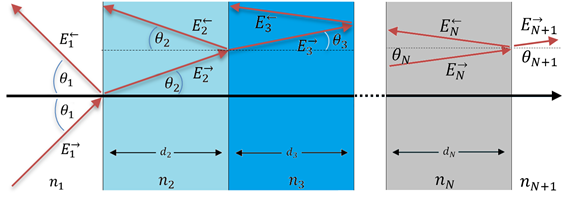

In [1]:
from IPython.display import Image
Image("multilayer_scheme.png")

<h1><center>Step 01: Inicializacion de K's </center></h1>

Taking into account that each layer will have its own wave vector according to its refractive index:

$$\widetilde{n}\mathbf{=} \ n_{R} - in_{I}$$

The wave vector will be deducted from:

$$k = \frac{\left( n_{R} - in_{I} \right)}{c}\text{w} = \frac{\left( n_{R} - in_{I} \right)}{\lambda}2\pi$$

In [3]:
ks= index*2*np.pi/lambd
print(ks)

[0.00992604+0.j 0.02511289+0.j 0.01488906+0.j 0.01369794+0.j
 0.00992604+0.j]


<h2><center>Step 02: Inicializacion de  θ's  (Ley de Snell)</center></h2>

The angles of the wave are defined in each layer taking into account:

$$n_{i}\sin(\theta_{I}) = n_{j}sin(\theta_{R})$$

In [4]:
for i in range(N+1):
    thetas[i+1] = np.arcsin(np.sin(thetas[i])*index[i]/index[i+1])
print(thetas)

[0.78539816+0.j 0.2832617 +0.j 0.49088268+0.j 0.53797283+0.j
 0.78539816+0.j]


<h2><center>2x2 Transfer matrix method (s polarization)</center></h2>

The equation that allows to describe the transfer of a wave through multiple layers is the following:

$$\begin{bmatrix} 1 \\ E_{1}^{\leftarrow}/E_{1}^{\rightarrow} \\ \end{bmatrix}\ = A\begin{bmatrix} E_{N + 1}^{\rightarrow}/E_{1}^{\rightarrow} \\ 0 \\ \end{bmatrix}$$

$$ Donde:  {A = \begin{bmatrix} 1 & 1 \\ n_{1}\cos\theta_{1} & {- n}_{1}\cos\theta_{1} \\ \end{bmatrix}}^{- 1}\left\lbrack \prod_{j = 2}^{N}M_{j} \right\rbrack\begin{bmatrix} 1 & 1 \\ n_{N + 1}\cos\theta_{N + 1} & {- n}_{N + 1}\cos\theta_{N + 1} \\ \end{bmatrix}$$

$$ Donde:  M_{j} = \begin{bmatrix} 1 & 1 \\ n_{j}\cos\theta_{j} & {- n}_{j}\cos\theta_{j} \\ \end{bmatrix}\begin{bmatrix} e^{i\phi_{j}} & e^{- i\phi_{j}} \\ n_{j}\cos{\theta_{j}e^{i\phi_{j}}} & - n_{j}\cos{\theta_{j}e^{- i\phi_{j}}} \\ \end{bmatrix}^{- 1}$$

$$ Donde:  \phi_{j} = \ \left\{ \begin{matrix} 0,\ \ \ j = 1 \\ k_{j}d_{j}\text{cos}\theta_{j},\ \ \ 2 \leq j \leq N \\ \end{matrix} \right.\ $$

-------------------------------------------------------------------------------------------------------------------------
<h2><center>Step 03: Calculation of phase shifts associated with propagation in the middle regions</center></h2>

Since it is already known both K's, θ's and d's it is possible to calculate all phase changes "φ" like this:

$$ \phi_{j} = \ \left\{ \begin{matrix} 0,\ \ \ j = 1 \\ k_{j}d_{j}\text{cos}\theta_{j},\ \ \ 2 \leq j \leq N \\ \end{matrix} \right.\ $$

In [5]:
phis = ks*ds*np.cos(thetas)
print(phis)

[0.        +0.j 3.23102326+0.j 1.75954339+0.j 1.5762546 +0.j
 0.        +0.j]


-------------------------------------------------------------------------------------------------------------------------
<h2><center>Step 04: Calculation of the matrices M</center></h2>



$$M_{j} = \begin{bmatrix} 1 & 1 \\ n_{j}\cos\theta_{j} & {- n}_{j}\cos\theta_{j} \\ \end{bmatrix}\begin{bmatrix} e^{i\phi_{j}} & e^{- i\phi_{j}} \\ n_{j}\cos{\theta_{j}e^{i\phi_{j}}} & - n_{j}\cos{\theta_{j}e^{- i\phi_{j}}} \\ \end{bmatrix}^{- 1}$$

In [6]:
ones=np.ones(N+2)
nc=index*np.cos(thetas)
ephi=np.exp(1j*phis)
n_ephi=np.exp(-1j*phis)

M1=np.reshape(np.array([ones,ones,nc,-nc]).T,[N+2,2,2])
M2=np.linalg.inv(np.reshape(np.array([ephi,n_ephi,nc*ephi,-nc*n_ephi]).T,[N+2,2,2]))
M=np.matmul(M1, M2)

-------------------------------------------------------------------------------------------------------------------------
<h2><center>Step 05: Product operator of the matrices M</center></h2>

$$\prod_{j = 2}^{N}M_{j}$$

In [7]:
prod=np.linalg.multi_dot(M[1:N+1])

-------------------------------------------------------------------------------------------------------------------------
<h2><center>Step 06: Calculation of the A matirx</center></h2>

$${A = \begin{bmatrix} 1 & 1 \\ n_{1}\cos\theta_{1} & {- n}_{1}\cos\theta_{1} \\ \end{bmatrix}}^{- 1}\left\lbrack \prod_{j = 1}^{N}M_{j} \right\rbrack\begin{bmatrix} 1 & 1 \\ n_{N + 1}\cos\theta_{N + 1} & {- n}_{N + 1}\cos\theta_{N + 1} \\ \end{bmatrix}$$

In [8]:
A1=np.linalg.inv([[1,1],[index[0]*np.cos(thetas[0]),-index[0]*np.cos(thetas[0])]])
A2=np.array([[1,1],[index[N+1]*np.cos(thetas[N+1]),-index[N+1]*np.cos(thetas[N+1])]])
A=A1@prod@A2

-------------------------------------------------------------------------------------------------------------------------
<h2><center>Step 07: Calculation of the Reflection, refraction and absorption indices</center></h2>

Accordin to the ecuation:

$$\begin{bmatrix} 1 \\ E_{1}^{\leftarrow}/E_{1}^{\rightarrow} \\ \end{bmatrix}\ = A\begin{bmatrix} E_{N + 1}^{\rightarrow}/E_{1}^{\rightarrow} \\ 0 \\ \end{bmatrix}$$

It can be determined the reflection and transmission indices as follows:

$$t_{\text{tot}} = \ \frac{E_{N + 1}^{\rightarrow}}{E_{1}^{\rightarrow}} = \ \frac{1}{a_{11}}$$
$$r_{\text{tot}} = \ \frac{E_{1}^{\leftarrow}}{E_{1}^{\rightarrow}} = \ \frac{a_{21}}{a_{11}}$$

In [10]:
t_tot=1/A[0,0]
r_tot=A[1,0]/A[0,0]
print("t = " + str(t_tot))
print("r = " + str(r_tot))
print("T = " + str(np.absolute(t_tot)**2))
print("R = " + str(np.absolute(r_tot)**2))
print("A = " + str(1-np.absolute(t_tot)**2-np.absolute(r_tot)**2))

t = (0.9073459163538996+0.3471675269443585j)
r = (-0.16380030156780467+0.1713696516817859j)
T = 0.9438019036887595
R = 0.05619809631124037
A = 1.3877787807814457e-16


________________________________________________________________________________________________________________________


<h2><center>2x2 Transfer matrix method (p polarization)</center></h2>

In the same way, the equation that allows to describe the transfer of a wave through multiple layers is the following:

$$\begin{bmatrix} 1 \\ E_{1}^{\leftarrow}/E_{1}^{\rightarrow} \\ \end{bmatrix}\ = A\begin{bmatrix} E_{N + 1}^{\rightarrow}/E_{1}^{\rightarrow} \\ 0 \\ \end{bmatrix}$$

$$ Donde:  {A = \begin{bmatrix} \cos\theta_{1} & \cos\theta_{1} \\ n_{1} & {- n}_{1} \\ \end{bmatrix}}^{- 1}\left\lbrack \prod_{j = 2}^{N}M_{j} \right\rbrack\begin{bmatrix} \cos\theta_{N + 1} & \cos\theta_{N + 1} \\ n_{N + 1} & {- n}_{N + 1} \\ \end{bmatrix}$$

$$ Donde:  M_{j} = \begin{bmatrix} \cos\theta_{j} & \cos\theta_{j} \\ n_{j} & {- n}_{j} \\ \end{bmatrix}\begin{bmatrix} \cos{\theta_{j}}e^{i\phi_{j}} & \cos{\theta_{j}}e^{- i\phi_{j}} \\ n_{j}e^{i\phi_{j}} & - n_{j}e^{- i\phi_{j}} \\ \end{bmatrix}^{- 1}$$

-------------------------------------------------------------------------------------------------------------------------
<h2><center>Step 08: Calculation of the matrices M</center></h2>

In [11]:
cos=np.cos(thetas)
ephi=np.exp(1j*phis)
n_ephi=np.exp(-1j*phis)

M1=np.reshape(np.array([cos,cos,index,-index]).T,[N+2,2,2])
M2=np.linalg.inv(np.reshape(np.array([cos*ephi,cos*n_ephi,index*ephi,-index*n_ephi]).T,[N+2,2,2]))
M=np.matmul(M1, M2)
#MM=np.reshape(np.array([np.cos(phis),-1j*np.sin(phis)*np.cos(thetas)/index,-1j*index*np.sin(phis)/np.cos(thetas),np.cos(phis)]).T,[N+2,2,2])

-------------------------------------------------------------------------------------------------------------------------
<h2><center>Step 09: Product operator of the matrices M</center></h2>

$$\prod_{j = 2}^{N}M_{j}$$

In [12]:
prod=np.linalg.multi_dot(M[1:N+1])

-------------------------------------------------------------------------------------------------------------------------
<h2><center>Step 10: Calculation of the A matirx</center></h2>

$$  {A = \begin{bmatrix} \cos\theta_{1} & \cos\theta_{1} \\ n_{1} & {- n}_{1} \\ \end{bmatrix}}^{- 1}\left\lbrack \prod_{j = 2}^{N}M_{j} \right\rbrack\begin{bmatrix} \cos\theta_{N + 1} & \cos\theta_{N + 1} \\ n_{N + 1} & {- n}_{N + 1} \\ \end{bmatrix}$$

In [13]:
A1=np.linalg.inv([[np.cos(thetas[0]),np.cos(thetas[0])],[index[0], -index[0]]])
A2=np.array([[np.cos(thetas[N+1]),np.cos(thetas[N+1])],[index[N+1],-index[N+1]]])
A = A1@prod@A2

Step 10 is repeated

In [14]:
t_tot=1/A[0,0]
r_tot=A[1,0]/A[0,0]
print("t = " + str(t_tot))
print("r = " + str(r_tot))
print("T = " + str(np.absolute(t_tot)**2))
print("R = " + str(np.absolute(r_tot)**2))
print("A = " + str(1-np.absolute(t_tot)**2-np.absolute(r_tot)**2))

t = (0.951737400642496+0.2934678144009234j)
r = (-0.06710757057577814+0.05974224719934586j)
T = 0.9919274378709898
R = 0.008072562129010792
A = -5.950101522600448e-16
